In [42]:
import sys
# Add the parent directory to the system path
sys.path.insert(1, r"C:\Users\sk88\Documents\Python")

#from Function_files.addresses import Init_Directories

import Function_files.data_functions as dat
from Function_files.math_functions import corrected_pulse_area
from Function_files.plotting_functions import plot_scope
from numpy import abs, divide
from TPA import TPA_config_new as config_file
import os

dir = r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\0507_TPA\Calibration"

In [43]:
# interogate directory to extract folder and file names
folder_list, file_list = dat.dir_interogate(path=dir, extensions=['avg.csv'], exceptions=['fast', '.png'])
# create dictionary for indexing folders and files
fol_i = dat.make_index_dict(folder_list)
fil_i = [dat.make_index_dict(file_sub_list) for file_sub_list in file_list]
# assemble reference paths
# extract excel data from the folders
data_path_list = dat.search_paths(folder_list, file_list, '.csv')
excel_sets = [[dat.open_csv(os.path.join(dir, data_path)) for data_path in data_paths] for data_paths in data_path_list]
di = dict(time = 0,
          sp_trans = 3,
          sp_ref = 4,
          cp_trans = 2,
          cp_ref = 1)
labels = {key:di[key] for key in di.keys() if key != 'time'}

solo_1550


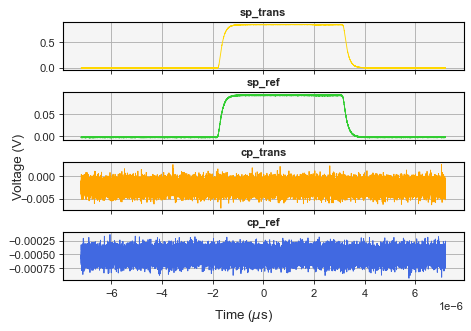

In [44]:
# plot 1550 reference data to check assignment
x = 'solo_1550'
fol = fol_i[x]
a = 0
fig, ax = plot_scope(excel_sets[fol][a][:,di['time']], [excel_sets[fol][a][:,di['sp_trans']], excel_sets[fol][a][:,di['sp_ref']], excel_sets[fol][a][:,di['cp_trans']], excel_sets[fol][a][:,di['cp_ref']]], titles=labels, multi=True)
print(x)

solo_995


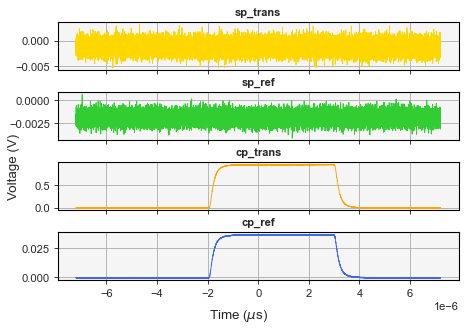

In [45]:
# plot 995 reference data to check assignment
x = 'solo_995'
fol = fol_i[x]
a = 0
fig, ax = plot_scope(excel_sets[fol][a][:,di['time']], [excel_sets[fol][a][:,di['sp_trans']], excel_sets[fol][a][:,di['sp_ref']], excel_sets[fol][a][:,di['cp_trans']], excel_sets[fol][a][:,di['cp_ref']]], titles=labels, multi=True)
print(x)

In [52]:
# time step of scope timebase
dt = (excel_sets[0][0][:,di['time']][1] - excel_sets[0][0][:,di['time']][0])*1E6
area_indexes = [[di['cp_trans'], di['cp_ref'], di['time'], 0, round(3/dt)], [di['sp_trans'], di['sp_ref'], di['time'], 0, round(3/dt)]]
ratios = []
for index, fol in enumerate(fol_i):
    empty = []
    count= 0
    for file in fil_i[index]:
        # calculate the normalised reference areas
        empty.append(corrected_pulse_area(excel_sets[fol_i[fol]][fil_i[index][file]], area_indexes[index]))
    ratios.append(empty)

In [53]:
ratios

[[25.6315785034577, 25.558783338379396, 25.328840751214912],
 [9.007040830654224, 8.920725232659565, 8.86824018022578]]

In [54]:
average = []
for set in ratios:
    avg = 0
    for value in set:
        avg += value
    average.append(avg/len(set))

average

[25.506400864350667, 8.932002081179856]

In [55]:
perc_av = []
for av, set in zip(average, ratios):
    perc = []
    for value in set:
        perc.append(abs(100-(100*(value/av))))
    perc_av.append(perc)

In [56]:
av_change = []
for set in perc_av:
    temp = 0
    for value in set:
        temp += value
    av_change.append(temp/len(set))

perc_av

[[0.49076951222070875, 0.20536991599604448, 0.6961394282167106],
 [0.840111195590481, 0.126252193156688, 0.7138590024338072]]

In [57]:
av_change

[0.4640929521444879, 0.5600741303936587]